learning a [Mackey-Glass](http://www.scholarpedia.org/article/Mackey-Glass_equation) system using Echo State Networks, and Evolutionary Algorithms in DEAP. 

Note: We are tuning up ESN's having a new Hyper-Sphere activation function - and if the EA always selects it, then I think perhaps it is Better!

In [1]:
import random

from deap import base
from deap import creator
from deap import tools
from deap import algorithms

import numpy as np
from pyESN import ESN

import datetime
import math


In [2]:
# here's how to evaluate the ESN
# Load the data:
data = np.load('mackey_glass_t17.npy') 
# 
def evaluate(individual):
    '''
    build and test a model based on the parameters in an individual and return
    the AUROC value
    '''
    # extract the values of the parameters from the individual chromosome
    
    my_n_reservoir = individual[0]
    my_projection = individual[1]
    my_noise = individual[2]
    my_rectifier = individual[3]
    my_steepness = individual[4]
    my_sparsity = individual[5]
    my_sphere_radius = individual[6]
    my_teacher_forcing = individual[7]
    my_random_state = individual[8]
    my_spectral_radius = individual[9]
  
    data = np.load('mackey_glass_t17.npy')
    #  http://minds.jacobs-university.de/mantas/code
    esn = ESN(n_inputs = 1,
          n_outputs = 1,
          n_reservoir = my_n_reservoir,
          spectral_radius = my_spectral_radius,
          noise = my_noise,
          sparsity = my_sparsity,
          projection = my_projection,
          steepness = my_steepness,
          sphere_radius = my_sphere_radius,
          rectifier = my_rectifier,
          random_state = my_random_state)    

    trainlen = 2000
    future = 2000
    pred_training = esn.fit(np.ones(trainlen),data[:trainlen])

    prediction = esn.predict(np.ones(future))
    mse = np.sqrt(np.mean((prediction.flatten() - data[trainlen:trainlen+future])**2))
    return mse, mse

In [3]:
# create a mutate function
def mutate(individual):
    
    gene = random.randint(0,9) # select which parameter to mutate
    
    if gene == 0:       # 0 attr_n_reservoir
        individual[0] = random.choice(n_reservoir) # grow or shrink the resevoir on mutate
        # if we swap the number of nodes in the reservoir, pick a new seed.
        # if we aren't swapping the node size, flip the seed anyway to get a new network, same size
        individual[8] = random.choice(random_state)  
        
    elif gene == 1:     # 1 attr_projection
        individual[1] = random.choice(projection)
        individual[0] = individual[0] + random.randint(-50, 50)

    elif gene == 2:     # 2 attr_noise
        individual[2] = random.choice(noise)
        #individual[0] = individual[0] + random.randint(-5, 50)
        
    elif gene == 3:     # 3 attr_rectifier
        individual[3] = random.choice(rectifier)
        #individual[0] = individual[0] + random.randint(-5, 50)
    
    elif gene ==4:      # 4 attr_steepness
        individual[4] = random.choice(steepness)
        individual[0] = individual[0] + random.randint(-50, 50)
    
    elif gene ==5:      # 5 attr_sparsity
        individual[5] = random.uniform(sparsity_low, sparsity_high)
        #random.choice(sparsity)
        #individual[0] = individual[0] + random.randint(-5, 50)
    
    elif gene == 6:     # 6 attr_sphere_radius
        individual[6] = random.uniform(sphere_low, sphere_high)
                        # = individual[6] + random.randint(-30, 30)*0.001   #random.choice(sphere_radius)
        #individual[0] = individual[0] + random.randint(-5, 50)
        
    elif gene ==7:      # 7 attr_teacher_forcing
        individual[7] = random.choice(teacher_forcing)
        individual[0] = individual[0] + random.randint(-50, 50)

    elif gene ==8:      # 8 attr_random_state
        individual[8] = random.choice(random_state)  
        #individual[0] = individual[0] + random.randint(-5, 50)

    elif gene == 9:     # 9 attr_spectral_radius
        #individual[9] = random.choice(spectral_radius)
        individual[9] = random.uniform (spectral_radius_low, spectral_radius_high)
                        #= individual[9] + random.randint(-30, 30)*0.001
        
    return individual, 
    # note the final comma, leave it in the return 

In [4]:
# Start by setting up the DEAP genetic search fitness function
creator.create("FitnessMin", base.Fitness, weights=(-1.0,)) # Minimize the fitness function value
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()

In [5]:
# Possible parameter values

# Size of the Reservoir
n_reservoir = [1000] #[800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000]
# projection:      0 = no projection, 1 = spherical projection (default), 2 = soft projection
projection = [1]

# noise:           0 = no noise (default), or set a noise value, ie 0.001, for (regularization)
noise = [0, 0, 0.00000000001]

# spectral radius
spectral_radius = [0.100,0.101,0.102,0.103,0.104,0.105,0.106,0.107,0.108,0.109,0.110,0.111,0.112,0.113,0.114,0.115,0.116,0.117,0.118,0.119,0.120,0.121,0.122,0.123,0.124,0.125,0.126,0.127,0.128,0.129,0.130,0.131,0.132,0.133,0.134,0.135,0.136,0.137,0.138,0.139,0.140,0.141,0.142,0.143,0.144,0.145,0.146,0.147,0.148,0.149,0.150,0.151,0.152,0.153,0.154,0.155,0.156,0.157,0.158,0.159,0.160,0.161,0.162,0.163,0.164,0.165,0.166,0.167,0.168,0.169,0.170,0.171,0.172,0.173,0.174,0.175,0.176,0.177,0.178,0.179,0.180,0.181,0.182,0.183,0.184,0.185,0.186,0.187,0.188,0.189,0.190,0.191,0.192,0.193,0.194,0.195,0.196,0.197,0.198,0.199,0.200,0.201,0.202,0.203,0.204,0.205,0.206,0.207,0.208,0.209,0.210,0.211,0.212,0.213,0.214,0.215,0.216,0.217,0.218,0.219,0.220,0.221,0.222,0.223,0.224,0.225,0.226,0.227,0.228,0.229,0.230,0.231,0.232,0.233,0.234,0.235,0.236,0.237,0.238,0.239,0.240,0.241,0.242,0.243,0.244,0.245,0.246,0.247,0.248,0.249,0.250,0.251,0.252,0.253,0.254,0.255,0.256,0.257,0.258,0.259,0.260,0.261,0.262,0.263,0.264,0.265,0.266,0.267,0.268,0.269,0.270,0.271,0.272,0.273,0.274,0.275,0.276,0.277,0.278,0.279,0.280,0.281,0.282,0.283,0.284,0.285,0.286,0.287,0.288,0.289,0.290,0.291,0.292,0.293,0.294,0.295,0.296,0.297,0.298,0.299,0.300,0.301,0.302,0.303,0.304,0.305,0.306,0.307,0.308,0.309,0.310,0.311,0.312,0.313,0.314,0.315,0.316,0.317,0.318,0.319,0.320,0.321,0.322,0.323,0.324,0.325,0.326,0.327,0.328,0.329,0.330,0.331,0.332,0.333,0.334,0.335,0.336,0.337,0.338,0.339,0.340,0.341,0.342,0.343,0.344,0.345,0.346,0.347,0.348,0.349,0.350,0.351,0.352,0.353,0.354,0.355,0.356,0.357,0.358,0.359,0.360,0.361,0.362,0.363,0.364,0.365,0.366,0.367,0.368,0.369,0.370,0.371,0.372,0.373,0.374,0.375,0.376,0.377,0.378,0.379,0.380,0.381,0.382,0.383,0.384,0.385,0.386,0.387,0.388,0.389,0.390,0.391,0.392,0.393,0.394,0.395,0.396,0.397,0.398,0.399,0.400,0.401,0.402,0.403,0.404,0.405,0.406,0.407,0.408,0.409,0.410,0.411,0.412,0.413,0.414,0.415,0.416,0.417,0.418,0.419,0.420,0.421,0.422,0.423,0.424,0.425,0.426,0.427,0.428,0.429,0.430,0.431,0.432,0.433,0.434,0.435,0.436,0.437,0.438,0.439,0.440,0.441,0.442,0.443,0.444,0.445,0.446,0.447,0.448,0.449,0.450,0.451,0.452,0.453,0.454,0.455,0.456,0.457,0.458,0.459,0.460,0.461,0.462,0.463,0.464,0.465,0.466,0.467,0.468,0.469,0.470,0.471,0.472,0.473,0.474,0.475,0.476,0.477,0.478,0.479,0.480,0.481,0.482,0.483,0.484,0.485,0.486,0.487,0.488,0.489,0.490,0.491,0.492,0.493,0.494,0.495,0.496,0.497,0.498,0.499,0.500,0.501,0.502,0.503,0.504,0.505,0.506,0.507,0.508,0.509,0.510,0.511,0.512,0.513,0.514,0.515,0.516,0.517,0.518,0.519,0.520,0.521,0.522,0.523,0.524,0.525,0.526,0.527,0.528,0.529,0.530,0.531,0.532,0.533,0.534,0.535,0.536,0.537,0.538,0.539,0.540,0.541,0.542,0.543,0.544,0.545,0.546,0.547,0.548,0.549,0.550,0.551,0.552,0.553,0.554,0.555,0.556,0.557,0.558,0.559,0.560,0.561,0.562,0.563,0.564,0.565,0.566,0.567,0.568,0.569,0.570,0.571,0.572,0.573,0.574,0.575,0.576,0.577,0.578,0.579,0.580,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590,0.591,0.592,0.593,0.594,0.595,0.596,0.597,0.598,0.599,0.600,0.601,0.602,0.603,0.604,0.605,0.606,0.607,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617,0.618,0.619,0.620,0.621,0.622,0.623,0.624,0.625,0.626,0.627,0.628,0.629,0.630,0.631,0.632,0.633,0.634,0.635,0.636,0.637,0.638,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648,0.649,0.650,0.651,0.652,0.653,0.654,0.655,0.656,0.657,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667,0.668,0.669,0.670,0.671,0.672,0.673,0.674,0.675,0.676,0.677,0.678,0.679,0.680,0.681,0.682,0.683,0.684,0.685,0.686,0.687,0.688,0.689,0.690,0.691,0.692,0.693,0.694,0.695,0.696,0.697,0.698,0.699,0.700,0.701,0.702,0.703,0.704,0.705,0.706,0.707,0.708,0.709,0.710,0.711,0.712,0.713,0.714,0.715,0.716,0.717,0.718,0.719,0.720,0.721,0.722,0.723,0.724,0.725,0.726,0.727,0.728,0.729,0.730,0.731,0.732,0.733,0.734,0.735,0.736,0.737,0.738,0.739,0.740,0.741,0.742,0.743,0.744,0.745,0.746,0.747,0.748,0.749,0.750,0.751,0.752,0.753,0.754,0.755,0.756,0.757,0.758,0.759,0.760,0.761,0.762,0.763,0.764,0.765,0.766,0.767,0.768,0.769,0.770,0.771,0.772,0.773,0.774,0.775,0.776,0.777,0.778,0.779,0.780,0.781,0.782,0.783,0.784,0.785,0.786,0.787,0.788,0.789,0.790,0.791,0.792,0.793,0.794,0.795,0.796,0.797,0.798,0.799,0.800,0.801,0.802,0.803,0.804,0.805,0.806,0.807,0.808,0.809,0.810,0.811,0.812,0.813,0.814,0.815,0.816,0.817,0.818,0.819,0.820,0.821,0.822,0.823,0.824,0.825,0.826,0.827,0.828,0.829,0.830,0.831,0.832,0.833,0.834,0.835,0.836,0.837,0.838,0.839,0.840,0.841,0.842,0.843,0.844,0.845,0.846,0.847,0.848,0.849,0.850,0.851,0.852,0.853,0.854,0.855,0.856,0.857,0.858,0.859,0.860,0.861,0.862,0.863,0.864,0.865,0.866,0.867,0.868,0.869,0.870,0.871,0.872,0.873,0.874,0.875,0.876,0.877,0.878,0.879,0.880,0.881,0.882,0.883,0.884,0.885,0.886,0.887,0.888,0.889,0.890,0.891,0.892,0.893,0.894,0.895,0.896,0.897,0.898,0.899,0.900,0.901,0.902,0.903,0.904,0.905,0.906,0.907,0.908,0.909,0.910,0.911,0.912,0.913,0.914,0.915,0.916,0.917,0.918,0.919,0.920,0.921,0.922,0.923,0.924,0.925,0.926,0.927,0.928,0.929,0.930,0.931,0.932,0.933,0.934,0.935,0.936,0.937,0.938,0.939,0.940,0.941,0.942,0.943,0.944,0.945,0.946,0.947,0.948,0.949,0.950,0.951,0.952,0.953,0.954,0.955,0.956,0.957,0.958,0.959,0.960,0.961,0.962,0.963,0.964,0.965,0.966,0.967,0.968,0.969,0.970,0.971,0.972,0.973,0.974,0.975,0.976,0.977,0.978,0.979,0.980,0.981,0.982,0.983,0.984,0.985,0.986,0.987,0.988,0.989,0.990,0.991,0.992,0.993,0.994,0.995,0.996,0.997,0.998,0.999,1.000,1.001,1.002,1.003,1.004,1.005,1.006,1.007,1.008,1.009,1.010,1.011,1.012,1.013,1.014,1.015,1.016,1.017,1.018,1.019,1.020,1.021,1.022,1.023,1.024,1.025,1.026,1.027,1.028,1.029,1.030,1.031,1.032,1.033,1.034,1.035,1.036,1.037,1.038,1.039,1.040,1.041,1.042,1.043,1.044,1.045,1.046,1.047,1.048,1.049,1.050,1.051,1.052,1.053,1.054,1.055,1.056,1.057,1.058,1.059,1.060,1.061,1.062,1.063,1.064,1.065,1.066,1.067,1.068,1.069,1.070,1.071,1.072,1.073,1.074,1.075,1.076,1.077,1.078,1.079,1.080,1.081,1.082,1.083,1.084,1.085,1.086,1.087,1.088,1.089,1.090,1.091,1.092,1.093,1.094,1.095,1.096,1.097,1.098,1.099,1.100,1.101,1.102,1.103,1.104,1.105,1.106,1.107,1.108,1.109,1.110,1.111,1.112,1.113,1.114,1.115,1.116,1.117,1.118,1.119,1.120,1.121,1.122,1.123,1.124,1.125,1.126,1.127,1.128,1.129,1.130,1.131,1.132,1.133,1.134,1.135,1.136,1.137,1.138,1.139,1.140,1.141,1.142,1.143,1.144,1.145,1.146,1.147,1.148,1.149,1.150,1.151,1.152,1.153,1.154,1.155,1.156,1.157,1.158,1.159,1.160,1.161,1.162,1.163,1.164,1.165,1.166,1.167,1.168,1.169,1.170,1.171,1.172,1.173,1.174,1.175,1.176,1.177,1.178,1.179,1.180,1.181,1.182,1.183,1.184,1.185,1.186,1.187,1.188,1.189,1.190,1.191,1.192,1.193,1.194,1.195,1.196,1.197,1.198,1.199,1.200,1.201,1.202,1.203,1.204,1.205,1.206,1.207,1.208,1.209,1.210,1.211,1.212,1.213,1.214,1.215,1.216,1.217,1.218,1.219,1.220,1.221,1.222,1.223,1.224,1.225,1.226,1.227,1.228,1.229,1.230,1.231,1.232,1.233,1.234,1.235,1.236,1.237,1.238,1.239,1.240,1.241,1.242,1.243,1.244,1.245,1.246,1.247,1.248,1.249,1.250,1.251,1.252,1.253,1.254,1.255,1.256,1.257,1.258,1.259,1.260,1.261,1.262,1.263,1.264,1.265,1.266,1.267,1.268,1.269,1.270,1.271,1.272,1.273,1.274,1.275,1.276,1.277,1.278,1.279,1.280,1.281,1.282,1.283,1.284,1.285,1.286,1.287,1.288,1.289,1.290,1.291,1.292,1.293,1.294,1.295,1.296,1.297,1.298,1.299,1.300,1.301,1.302,1.303,1.304,1.305,1.306,1.307,1.308,1.309,1.310,1.311,1.312,1.313,1.314,1.315,1.316,1.317,1.318,1.319,1.320,1.321,1.322,1.323,1.324,1.325,1.326,1.327,1.328,1.329,1.330,1.331,1.332,1.333,1.334,1.335,1.336,1.337,1.338,1.339,1.340,1.341,1.342,1.343,1.344,1.345,1.346,1.347,1.348,1.349,1.350,1.351,1.352,1.353,1.354,1.355,1.356,1.357,1.358,1.359,1.360,1.361,1.362,1.363,1.364,1.365,1.366,1.367,1.368,1.369,1.370,1.371,1.372,1.373,1.374,1.375,1.376,1.377,1.378,1.379,1.380,1.381,1.382,1.383,1.384,1.385,1.386,1.387,1.388,1.389,1.390,1.391,1.392,1.393,1.394,1.395,1.396,1.397,1.398,1.399,1.400,1.401,1.402,1.403,1.404,1.405,1.406,1.407,1.408,1.409,1.410,1.411,1.412,1.413,1.414,1.415,1.416,1.417,1.418,1.419,1.420,1.421,1.422,1.423,1.424,1.425,1.426,1.427,1.428,1.429,1.430,1.431,1.432,1.433,1.434,1.435,1.436,1.437,1.438,1.439,1.440,1.441,1.442,1.443,1.444,1.445,1.446,1.447,1.448,1.449,1.450,1.451,1.452,1.453,1.454,1.455,1.456,1.457,1.458,1.459,1.460,1.461,1.462,1.463,1.464,1.465,1.466,1.467,1.468,1.469,1.470,1.471,1.472,1.473,1.474,1.475,1.476,1.477,1.478,1.479,1.480,1.481,1.482,1.483,1.484,1.485,1.486,1.487,1.488,1.489,1.490,1.491,1.492,1.493,1.494,1.495,1.496,1.497,1.498,1.499,1.500] 

# rectifier:       0 = no rectifier (ie linear) default, 1 = hard tanh rectifier
rectifier = [0, 1]

# steepness: default is 2, or set a specfic steepness override to control soft projection
steepness = [2]

# sparsity
sparsity = [0.100,0.101,0.102,0.103,0.104,0.105,0.106,0.107,0.108,0.109,0.110,0.111,0.112,0.113,0.114,0.115,0.116,0.117,0.118,0.119,0.120,0.121,0.122,0.123,0.124,0.125,0.126,0.127,0.128,0.129,0.130,0.131,0.132,0.133,0.134,0.135,0.136,0.137,0.138,0.139,0.140,0.141,0.142,0.143,0.144,0.145,0.146,0.147,0.148,0.149,0.150,0.151,0.152,0.153,0.154,0.155,0.156,0.157,0.158,0.159,0.160,0.161,0.162,0.163,0.164,0.165,0.166,0.167,0.168,0.169,0.170,0.171,0.172,0.173,0.174,0.175,0.176,0.177,0.178,0.179,0.180,0.181,0.182,0.183,0.184,0.185,0.186,0.187,0.188,0.189,0.190,0.191,0.192,0.193,0.194,0.195,0.196,0.197,0.198,0.199,0.200,0.201,0.202,0.203,0.204,0.205,0.206,0.207,0.208,0.209,0.210,0.211,0.212,0.213,0.214,0.215,0.216,0.217,0.218,0.219,0.220,0.221,0.222,0.223,0.224,0.225,0.226,0.227,0.228,0.229,0.230,0.231,0.232,0.233,0.234,0.235,0.236,0.237,0.238,0.239,0.240,0.241,0.242,0.243,0.244,0.245,0.246,0.247,0.248,0.249,0.250,0.251,0.252,0.253,0.254,0.255,0.256,0.257,0.258,0.259,0.260,0.261,0.262,0.263,0.264,0.265,0.266,0.267,0.268,0.269,0.270,0.271,0.272,0.273,0.274,0.275,0.276,0.277,0.278,0.279,0.280,0.281,0.282,0.283,0.284,0.285,0.286,0.287,0.288,0.289,0.290,0.291,0.292,0.293,0.294,0.295,0.296,0.297,0.298,0.299,0.300,0.301,0.302,0.303,0.304,0.305,0.306,0.307,0.308,0.309,0.310,0.311,0.312,0.313,0.314,0.315,0.316,0.317,0.318,0.319,0.320,0.321,0.322,0.323,0.324,0.325,0.326,0.327,0.328,0.329,0.330,0.331,0.332,0.333,0.334,0.335,0.336,0.337,0.338,0.339,0.340,0.341,0.342,0.343,0.344,0.345,0.346,0.347,0.348,0.349,0.350,0.351,0.352,0.353,0.354,0.355,0.356,0.357,0.358,0.359,0.360,0.361,0.362,0.363,0.364,0.365,0.366,0.367,0.368,0.369,0.370,0.371,0.372,0.373,0.374,0.375,0.376,0.377,0.378,0.379,0.380,0.381,0.382,0.383,0.384,0.385,0.386,0.387,0.388,0.389,0.390,0.391,0.392,0.393,0.394,0.395,0.396,0.397,0.398,0.399,0.400,0.401,0.402,0.403,0.404,0.405,0.406,0.407,0.408,0.409,0.410,0.411,0.412,0.413,0.414,0.415,0.416,0.417,0.418,0.419,0.420,0.421,0.422,0.423,0.424,0.425,0.426,0.427,0.428,0.429,0.430,0.431,0.432,0.433,0.434,0.435,0.436,0.437,0.438,0.439,0.440,0.441,0.442,0.443,0.444,0.445,0.446,0.447,0.448,0.449,0.450,0.451,0.452,0.453,0.454,0.455,0.456,0.457,0.458,0.459,0.460,0.461,0.462,0.463,0.464,0.465,0.466,0.467,0.468,0.469,0.470,0.471,0.472,0.473,0.474,0.475,0.476,0.477,0.478,0.479,0.480,0.481,0.482,0.483,0.484,0.485,0.486,0.487,0.488,0.489,0.490,0.491,0.492,0.493,0.494,0.495,0.496,0.497,0.498,0.499,0.500,0.501,0.502,0.503,0.504,0.505,0.506,0.507,0.508,0.509,0.510,0.511,0.512,0.513,0.514,0.515,0.516,0.517,0.518,0.519,0.520,0.521,0.522,0.523,0.524,0.525,0.526,0.527,0.528,0.529,0.530,0.531,0.532,0.533,0.534,0.535,0.536,0.537,0.538,0.539,0.540,0.541,0.542,0.543,0.544,0.545,0.546,0.547,0.548,0.549,0.550,0.551,0.552,0.553,0.554,0.555,0.556,0.557,0.558,0.559,0.560,0.561,0.562,0.563,0.564,0.565,0.566,0.567,0.568,0.569,0.570,0.571,0.572,0.573,0.574,0.575,0.576,0.577,0.578,0.579,0.580,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590,0.591,0.592,0.593,0.594,0.595,0.596,0.597,0.598,0.599,0.600,0.601,0.602,0.603,0.604,0.605,0.606,0.607,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617,0.618,0.619,0.620,0.621,0.622,0.623,0.624,0.625,0.626,0.627,0.628,0.629,0.630,0.631,0.632,0.633,0.634,0.635,0.636,0.637,0.638,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648,0.649,0.650,0.651,0.652,0.653,0.654,0.655,0.656,0.657,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667,0.668,0.669,0.670,0.671,0.672,0.673,0.674,0.675,0.676,0.677,0.678,0.679,0.680,0.681,0.682,0.683,0.684,0.685,0.686,0.687,0.688,0.689,0.690,0.691,0.692,0.693,0.694,0.695,0.696,0.697,0.698,0.699,0.700,0.701,0.702,0.703,0.704,0.705,0.706,0.707,0.708,0.709,0.710,0.711,0.712,0.713,0.714,0.715,0.716,0.717,0.718,0.719,0.720,0.721,0.722,0.723,0.724,0.725,0.726,0.727,0.728,0.729,0.730,0.731,0.732,0.733,0.734,0.735,0.736,0.737,0.738,0.739,0.740,0.741,0.742,0.743,0.744,0.745,0.746,0.747,0.748,0.749,0.750,0.751,0.752,0.753,0.754,0.755,0.756,0.757,0.758,0.759,0.760,0.761,0.762,0.763,0.764,0.765,0.766,0.767,0.768,0.769,0.770,0.771,0.772,0.773,0.774,0.775,0.776,0.777,0.778,0.779,0.780,0.781,0.782,0.783,0.784,0.785,0.786,0.787,0.788,0.789,0.790,0.791,0.792,0.793,0.794,0.795,0.796,0.797,0.798,0.799,0.800,0.801,0.802,0.803,0.804,0.805,0.806,0.807,0.808,0.809,0.810,0.811,0.812,0.813,0.814,0.815,0.816,0.817,0.818,0.819,0.820,0.821,0.822,0.823,0.824,0.825,0.826,0.827,0.828,0.829,0.830,0.831,0.832,0.833,0.834,0.835,0.836,0.837,0.838,0.839,0.840,0.841,0.842,0.843,0.844,0.845,0.846,0.847,0.848,0.849,0.850,0.851,0.852,0.853,0.854,0.855,0.856,0.857,0.858,0.859,0.860,0.861,0.862,0.863,0.864,0.865,0.866,0.867,0.868,0.869,0.870,0.871,0.872,0.873,0.874,0.875,0.876,0.877,0.878,0.879,0.880,0.881,0.882,0.883,0.884,0.885,0.886,0.887,0.888,0.889,0.890,0.891,0.892,0.893,0.894,0.895,0.896,0.897,0.898,0.899,0.900,0.901,0.902,0.903,0.904,0.905,0.906,0.907,0.908,0.909,0.910,0.911,0.912,0.913,0.914,0.915,0.916,0.917,0.918,0.919,0.920,0.921,0.922,0.923,0.924,0.925,0.926,0.927,0.928,0.929,0.930,0.931,0.932,0.933,0.934,0.935,0.936,0.937,0.938,0.939,0.940,0.941,0.942,0.943,0.944,0.945,0.946,0.947,0.948,0.949] 

# sphere_radius
sphere_radius = [01.00,01.01,01.02,01.03,01.04,01.05,01.06,01.07,01.08,01.09,01.10,01.11,01.12,01.13,01.14,01.15,01.16,01.17,01.18,01.19,01.20,01.21,01.22,01.23,01.24,01.25,01.26,01.27,01.28,01.29,01.30,01.31,01.32,01.33,01.34,01.35,01.36,01.37,01.38,01.39,01.40,01.41,01.42,01.43,01.44,01.45,01.46,01.47,01.48,01.49,01.50,01.51,01.52,01.53,01.54,01.55,01.56,01.57,01.58,01.59,01.60,01.61,01.62,01.63,01.64,01.65,01.66,01.67,01.68,01.69,01.70,01.71,01.72,01.73,01.74,01.75,01.76,01.77,01.78,01.79,01.80,01.81,01.82,01.83,01.84,01.85,01.86,01.87,01.88,01.89,01.90,01.91,01.92,01.93,01.94,01.95,01.96,01.97,01.98,01.99,02.00,02.01,02.02,02.03,02.04,02.05,02.06,02.07,02.08,02.09,02.10,02.11,02.12,02.13,02.14,02.15,02.16,02.17,02.18,02.19,02.20,02.21,02.22,02.23,02.24,02.25,02.26,02.27,02.28,02.29,02.30,02.31,02.32,02.33,02.34,02.35,02.36,02.37,02.38,02.39,02.40,02.41,02.42,02.43,02.44,02.45,02.46,02.47,02.48,02.49,02.50,02.51,02.52,02.53,02.54,02.55,02.56,02.57,02.58,02.59,02.60,02.61,02.62,02.63,02.64,02.65,02.66,02.67,02.68,02.69,02.70,02.71,02.72,02.73,02.74,02.75,02.76,02.77,02.78,02.79,02.80,02.81,02.82,02.83,02.84,02.85,02.86,02.87,02.88,02.89,02.90,02.91,02.92,02.93,02.94,02.95,02.96,02.97,02.98,02.99,03.00,03.01,03.02,03.03,03.04,03.05,03.06,03.07,03.08,03.09,03.10,03.11,03.12,03.13,03.14,03.15,03.16,03.17,03.18,03.19,03.20,03.21,03.22,03.23,03.24,03.25,03.26,03.27,03.28,03.29,03.30,03.31,03.32,03.33,03.34,03.35,03.36,03.37,03.38,03.39,03.40,03.41,03.42,03.43,03.44,03.45,03.46,03.47,03.48,03.49,03.50,03.51,03.52,03.53,03.54,03.55,03.56,03.57,03.58,03.59,03.60,03.61,03.62,03.63,03.64,03.65,03.66,03.67,03.68,03.69,03.70,03.71,03.72,03.73,03.74,03.75,03.76,03.77,03.78,03.79,03.80,03.81,03.82,03.83,03.84,03.85,03.86,03.87,03.88,03.89,03.90,03.91,03.92,03.93,03.94,03.95,03.96,03.97,03.98,03.99,04.00,04.01,04.02,04.03,04.04,04.05,04.06,04.07,04.08,04.09,04.10,04.11,04.12,04.13,04.14,04.15,04.16,04.17,04.18,04.19,04.20,04.21,04.22,04.23,04.24,04.25,04.26,04.27,04.28,04.29,04.30,04.31,04.32,04.33,04.34,04.35,04.36,04.37,04.38,04.39,04.40,04.41,04.42,04.43,04.44,04.45,04.46,04.47,04.48,04.49,04.50,04.51,04.52,04.53,04.54,04.55,04.56,04.57,04.58,04.59,04.60,04.61,04.62,04.63,04.64,04.65,04.66,04.67,04.68,04.69,04.70,04.71,04.72,04.73,04.74,04.75,04.76,04.77,04.78,04.79,04.80,04.81,04.82,04.83,04.84,04.85,04.86,04.87,04.88,04.89,04.90,04.91,04.92,04.93,04.94,04.95,04.96,04.97,04.98,04.99,05.00,05.01,05.02,05.03,05.04,05.05,05.06,05.07,05.08,05.09,05.10,05.11,05.12,05.13,05.14,05.15,05.16,05.17,05.18,05.19,05.20,05.21,05.22,05.23,05.24,05.25,05.26,05.27,05.28,05.29,05.30,05.31,05.32,05.33,05.34,05.35,05.36,05.37,05.38,05.39,05.40,05.41,05.42,05.43,05.44,05.45,05.46,05.47,05.48,05.49,05.50,05.51,05.52,05.53,05.54,05.55,05.56,05.57,05.58,05.59,05.60,05.61,05.62,05.63,05.64,05.65,05.66,05.67,05.68,05.69,05.70,05.71,05.72,05.73,05.74,05.75,05.76,05.77,05.78,05.79,05.80,05.81,05.82,05.83,05.84,05.85,05.86,05.87,05.88,05.89,05.90,05.91,05.92,05.93,05.94,05.95,05.96,05.97,05.98,05.99,06.00,06.01,06.02,06.03,06.04,06.05,06.06,06.07,06.08,06.09,06.10,06.11,06.12,06.13,06.14,06.15,06.16,06.17,06.18,06.19,06.20,06.21,06.22,06.23,06.24,06.25,06.26,06.27,06.28,06.29,06.30,06.31,06.32,06.33,06.34,06.35,06.36,06.37,06.38,06.39,06.40,06.41,06.42,06.43,06.44,06.45,06.46,06.47,06.48,06.49,06.50,06.51,06.52,06.53,06.54,06.55,06.56,06.57,06.58,06.59,06.60,06.61,06.62,06.63,06.64,06.65,06.66,06.67,06.68,06.69,06.70,06.71,06.72,06.73,06.74,06.75,06.76,06.77,06.78,06.79,06.80,06.81,06.82,06.83,06.84,06.85,06.86,06.87,06.88,06.89,06.90,06.91,06.92,06.93,06.94,06.95,06.96,06.97,06.98,06.99,07.00,07.01,07.02,07.03,07.04,07.05,07.06,07.07,07.08,07.09,07.10,07.11,07.12,07.13,07.14,07.15,07.16,07.17,07.18,07.19,07.20,07.21,07.22,07.23,07.24,07.25,07.26,07.27,07.28,07.29,07.30,07.31,07.32,07.33,07.34,07.35,07.36,07.37,07.38,07.39,07.40,07.41,07.42,07.43,07.44,07.45,07.46,07.47,07.48,07.49,07.50,07.51,07.52,07.53,07.54,07.55,07.56,07.57,07.58,07.59,07.60,07.61,07.62,07.63,07.64,07.65,07.66,07.67,07.68,07.69,07.70,07.71,07.72,07.73,07.74,07.75,07.76,07.77,07.78,07.79,07.80,07.81,07.82,07.83,07.84,07.85,07.86,07.87,07.88,07.89,07.90,07.91,07.92,07.93,07.94,07.95,07.96,07.97,07.98,07.99,08.00,08.01,08.02,08.03,08.04,08.05,08.06,08.07,08.08,08.09,08.10,08.11,08.12,08.13,08.14,08.15,08.16,08.17,08.18,08.19,08.20,08.21,08.22,08.23,08.24,08.25,08.26,08.27,08.28,08.29,08.30,08.31,08.32,08.33,08.34,08.35,08.36,08.37,08.38,08.39,08.40,08.41,08.42,08.43,08.44,08.45,08.46,08.47,08.48,08.49,08.50,08.51,08.52,08.53,08.54,08.55,08.56,08.57,08.58,08.59,08.60,08.61,08.62,08.63,08.64,08.65,08.66,08.67,08.68,08.69,08.70,08.71,08.72,08.73,08.74,08.75,08.76,08.77,08.78,08.79,08.80,08.81,08.82,08.83,08.84,08.85,08.86,08.87,08.88,08.89,08.90,08.91,08.92,08.93,08.94,08.95,08.96,08.97,08.98,08.99,09.00,09.01,09.02,09.03,09.04,09.05,09.06,09.07,09.08,09.09,09.10,09.11,09.12,09.13,09.14,09.15,09.16,09.17,09.18,09.19,09.20,09.21,09.22,09.23,09.24,09.25,09.26,09.27,09.28,09.29,09.30,09.31,09.32,09.33,09.34,09.35,09.36,09.37,09.38,09.39,09.40,09.41,09.42,09.43,09.44,09.45,09.46,09.47,09.48,09.49,09.50,09.51,09.52,09.53,09.54,09.55,09.56,09.57,09.58,09.59,09.60,09.61,09.62,09.63,09.64,09.65,09.66,09.67,09.68,09.69,09.70,09.71,09.72,09.73,09.74,09.75,09.76,09.77,09.78,09.79,09.80,09.81,09.82,09.83,09.84,09.85,09.86,09.87,09.88,09.89,09.90,09.91,09.92,09.93,09.94,09.95,09.96,09.97,09.98,09.99,10.00,10.01,10.02,10.03,10.04,10.05,10.06,10.07,10.08,10.09,10.10,10.11,10.12,10.13,10.14,10.15,10.16,10.17,10.18,10.19,10.20,10.21,10.22,10.23,10.24,10.25,10.26,10.27,10.28,10.29,10.30,10.31,10.32,10.33,10.34,10.35,10.36,10.37,10.38,10.39,10.40,10.41,10.42,10.43,10.44,10.45,10.46,10.47,10.48,10.49,10.50,10.51,10.52,10.53,10.54,10.55,10.56,10.57,10.58,10.59,10.60,10.61,10.62,10.63,10.64,10.65,10.66,10.67,10.68,10.69,10.70,10.71,10.72,10.73,10.74,10.75,10.76,10.77,10.78,10.79,10.80,10.81,10.82,10.83,10.84,10.85,10.86,10.87,10.88,10.89,10.90,10.91,10.92,10.93,10.94,10.95,10.96,10.97,10.98,10.99,11.00,11.01,11.02,11.03,11.04,11.05,11.06,11.07,11.08,11.09,11.10,11.11,11.12,11.13,11.14,11.15,11.16,11.17,11.18,11.19,11.20,11.21,11.22,11.23,11.24,11.25,11.26,11.27,11.28,11.29,11.30,11.31,11.32,11.33,11.34,11.35,11.36,11.37,11.38,11.39,11.40,11.41,11.42,11.43,11.44,11.45,11.46,11.47,11.48,11.49,11.50,11.51,11.52,11.53,11.54,11.55,11.56,11.57,11.58,11.59,11.60,11.61,11.62,11.63,11.64,11.65,11.66,11.67,11.68,11.69,11.70,11.71,11.72,11.73,11.74,11.75,11.76,11.77,11.78,11.79,11.80,11.81,11.82,11.83,11.84,11.85,11.86,11.87,11.88,11.89,11.90,11.91,11.92,11.93,11.94,11.95,11.96,11.97,11.98,11.99,12.00,12.01,12.02,12.03,12.04,12.05,12.06,12.07,12.08,12.09,12.10,12.11,12.12,12.13,12.14,12.15,12.16,12.17,12.18,12.19,12.20,12.21,12.22,12.23,12.24,12.25,12.26,12.27,12.28,12.29,12.30,12.31,12.32,12.33,12.34,12.35,12.36,12.37,12.38,12.39,12.40,12.41,12.42,12.43,12.44,12.45,12.46,12.47,12.48,12.49,12.50,12.51,12.52,12.53,12.54,12.55,12.56,12.57,12.58,12.59,12.60,12.61,12.62,12.63,12.64,12.65,12.66,12.67,12.68,12.69,12.70,12.71,12.72,12.73,12.74,12.75,12.76,12.77,12.78,12.79,12.80,12.81,12.82,12.83,12.84,12.85,12.86,12.87,12.88,12.89,12.90,12.91,12.92,12.93,12.94,12.95,12.96,12.97,12.98,12.99,13.00,13.01,13.02,13.03,13.04,13.05,13.06,13.07,13.08,13.09,13.10,13.11,13.12,13.13,13.14,13.15,13.16,13.17,13.18,13.19,13.20,13.21,13.22,13.23,13.24,13.25,13.26,13.27,13.28,13.29,13.30,13.31,13.32,13.33,13.34,13.35,13.36,13.37,13.38,13.39,13.40,13.41,13.42,13.43,13.44,13.45,13.46,13.47,13.48,13.49,13.50,13.51,13.52,13.53,13.54,13.55,13.56,13.57,13.58,13.59,13.60,13.61,13.62,13.63,13.64,13.65,13.66,13.67,13.68,13.69,13.70,13.71,13.72,13.73,13.74,13.75,13.76,13.77,13.78,13.79,13.80,13.81,13.82,13.83,13.84,13.85,13.86,13.87,13.88,13.89,13.90,13.91,13.92,13.93,13.94,13.95,13.96,13.97,13.98,13.99,14.00,14.01,14.02,14.03,14.04,14.05,14.06,14.07,14.08,14.09,14.10,14.11,14.12,14.13,14.14,14.15,14.16,14.17,14.18,14.19,14.20,14.21,14.22,14.23,14.24,14.25,14.26,14.27,14.28,14.29,14.30,14.31,14.32,14.33,14.34,14.35,14.36,14.37,14.38,14.39,14.40,14.41,14.42,14.43,14.44,14.45,14.46,14.47,14.48,14.49,14.50,14.51,14.52,14.53,14.54,14.55,14.56,14.57,14.58,14.59,14.60,14.61,14.62,14.63,14.64,14.65,14.66,14.67,14.68,14.69,14.70,14.71,14.72,14.73,14.74,14.75,14.76,14.77,14.78,14.79,14.80,14.81,14.82,14.83,14.84,14.85,14.86,14.87,14.88,14.89,14.90,14.91,14.92,14.93,14.94,14.95,14.96,14.97,14.98,14.99,15.00,15.01,15.02,15.03,15.04,15.05,15.06,15.07,15.08,15.09,15.10,15.11,15.12,15.13,15.14,15.15,15.16,15.17,15.18,15.19,15.20,15.21,15.22,15.23,15.24,15.25,15.26,15.27,15.28,15.29,15.30,15.31,15.32,15.33,15.34,15.35,15.36,15.37,15.38,15.39,15.40,15.41,15.42,15.43,15.44,15.45,15.46,15.47,15.48,15.49,15.50,15.51,15.52,15.53,15.54,15.55,15.56,15.57,15.58,15.59,15.60,15.61,15.62,15.63,15.64,15.65,15.66,15.67,15.68,15.69,15.70,15.71,15.72,15.73,15.74,15.75,15.76,15.77,15.78,15.79,15.80,15.81,15.82,15.83,15.84,15.85,15.86,15.87,15.88,15.89,15.90,15.91,15.92,15.93,15.94,15.95,15.96,15.97,15.98,15.99,16.00,16.01,16.02,16.03,16.04,16.05,16.06,16.07,16.08,16.09,16.10,16.11,16.12,16.13,16.14,16.15,16.16,16.17,16.18,16.19,16.20,16.21,16.22,16.23,16.24,16.25,16.26,16.27,16.28,16.29,16.30,16.31,16.32,16.33,16.34,16.35,16.36,16.37,16.38,16.39,16.40,16.41,16.42,16.43,16.44,16.45,16.46,16.47,16.48,16.49,16.50,16.51,16.52,16.53,16.54,16.55,16.56,16.57,16.58,16.59,16.60,16.61,16.62,16.63,16.64,16.65,16.66,16.67,16.68,16.69,16.70,16.71,16.72,16.73,16.74,16.75,16.76,16.77,16.78,16.79,16.80,16.81,16.82,16.83,16.84,16.85,16.86,16.87,16.88,16.89,16.90,16.91,16.92,16.93,16.94,16.95,16.96,16.97,16.98,16.99,17.00,17.01,17.02,17.03,17.04,17.05,17.06,17.07,17.08,17.09,17.10,17.11,17.12,17.13,17.14,17.15,17.16,17.17,17.18,17.19,17.20,17.21,17.22,17.23,17.24,17.25,17.26,17.27,17.28,17.29,17.30,17.31,17.32,17.33,17.34,17.35,17.36,17.37,17.38,17.39,17.40,17.41,17.42,17.43,17.44,17.45,17.46,17.47,17.48,17.49,17.50,17.51,17.52,17.53,17.54,17.55,17.56,17.57,17.58,17.59,17.60,17.61,17.62,17.63,17.64,17.65,17.66,17.67,17.68,17.69,17.70,17.71,17.72,17.73,17.74,17.75,17.76,17.77,17.78,17.79,17.80,17.81,17.82,17.83,17.84,17.85,17.86,17.87,17.88,17.89,17.90,17.91,17.92,17.93,17.94,17.95,17.96,17.97,17.98,17.99,18.00,18.01,18.02,18.03,18.04,18.05,18.06,18.07,18.08,18.09,18.10,18.11,18.12,18.13,18.14,18.15,18.16,18.17,18.18,18.19,18.20,18.21,18.22,18.23,18.24,18.25,18.26,18.27,18.28,18.29,18.30,18.31,18.32,18.33,18.34,18.35,18.36,18.37,18.38,18.39,18.40,18.41,18.42,18.43,18.44,18.45,18.46,18.47,18.48,18.49,18.50,18.51,18.52,18.53,18.54,18.55,18.56,18.57,18.58,18.59,18.60,18.61,18.62,18.63,18.64,18.65,18.66,18.67,18.68,18.69,18.70,18.71,18.72,18.73,18.74,18.75,18.76,18.77,18.78,18.79,18.80,18.81,18.82,18.83,18.84,18.85,18.86,18.87,18.88,18.89,18.90,18.91,18.92,18.93,18.94,18.95,18.96,18.97,18.98,18.99,19.00,19.01,19.02,19.03,19.04,19.05,19.06,19.07,19.08,19.09,19.10,19.11,19.12,19.13,19.14,19.15,19.16,19.17,19.18,19.19,19.20,19.21,19.22,19.23,19.24,19.25,19.26,19.27,19.28,19.29,19.30,19.31,19.32,19.33,19.34,19.35,19.36,19.37,19.38,19.39,19.40,19.41,19.42,19.43,19.44,19.45,19.46,19.47,19.48,19.49,19.50,19.51,19.52,19.53,19.54,19.55,19.56,19.57,19.58,19.59,19.60,19.61,19.62,19.63,19.64,19.65,19.66,19.67,19.68,19.69,19.70,19.71,19.72,19.73,19.74,19.75,19.76,19.77,19.78,19.79,19.80,19.81,19.82,19.83,19.84,19.85,19.86,19.87,19.88,19.89,19.90,19.91,19.92,19.93,19.94,19.95,19.96,19.97,19.98,19.99,20.00,20.01,20.02,20.03,20.04,20.05,20.06,20.07,20.08,20.09,20.10,20.11,20.12,20.13,20.14,20.15,20.16,20.17,20.18,20.19,20.20,20.21,20.22,20.23,20.24,20.25,20.26,20.27,20.28,20.29,20.30,20.31,20.32,20.33,20.34,20.35,20.36,20.37,20.38,20.39,20.40,20.41,20.42,20.43,20.44,20.45,20.46,20.47,20.48,20.49,20.50,20.51,20.52,20.53,20.54,20.55,20.56,20.57,20.58,20.59,20.60,20.61,20.62,20.63,20.64,20.65,20.66,20.67,20.68,20.69,20.70,20.71,20.72,20.73,20.74,20.75,20.76,20.77,20.78,20.79,20.80,20.81,20.82,20.83,20.84,20.85,20.86,20.87,20.88,20.89,20.90,20.91,20.92,20.93,20.94,20.95,20.96,20.97,20.98,20.99,21.00,21.01,21.02,21.03,21.04,21.05,21.06,21.07,21.08,21.09,21.10,21.11,21.12,21.13,21.14,21.15,21.16,21.17,21.18,21.19,21.20,21.21,21.22,21.23,21.24,21.25,21.26,21.27,21.28,21.29,21.30,21.31,21.32,21.33,21.34,21.35,21.36,21.37,21.38,21.39,21.40,21.41,21.42,21.43,21.44,21.45,21.46,21.47,21.48,21.49,21.50,21.51,21.52,21.53,21.54,21.55,21.56,21.57,21.58,21.59,21.60,21.61,21.62,21.63,21.64,21.65,21.66,21.67,21.68,21.69,21.70,21.71,21.72,21.73,21.74,21.75,21.76,21.77,21.78,21.79,21.80,21.81,21.82,21.83,21.84,21.85,21.86,21.87,21.88,21.89,21.90,21.91,21.92,21.93,21.94,21.95,21.96,21.97,21.98,21.99,22.00,22.01,22.02,22.03,22.04,22.05,22.06,22.07,22.08,22.09,22.10,22.11,22.12,22.13,22.14,22.15,22.16,22.17,22.18,22.19,22.20,22.21,22.22,22.23,22.24,22.25,22.26,22.27,22.28,22.29,22.30,22.31,22.32,22.33,22.34,22.35,22.36,22.37,22.38,22.39,22.40,22.41,22.42,22.43,22.44,22.45,22.46,22.47,22.48,22.49,22.50,22.51,22.52,22.53,22.54,22.55,22.56,22.57,22.58,22.59,22.60,22.61,22.62,22.63,22.64,22.65,22.66,22.67,22.68,22.69,22.70,22.71,22.72,22.73,22.74,22.75,22.76,22.77,22.78,22.79,22.80,22.81,22.82,22.83,22.84,22.85,22.86,22.87,22.88,22.89,22.90,22.91,22.92,22.93,22.94,22.95,22.96,22.97,22.98,22.99,23.00,23.01,23.02,23.03,23.04,23.05,23.06,23.07,23.08,23.09,23.10,23.11,23.12,23.13,23.14,23.15,23.16,23.17,23.18,23.19,23.20,23.21,23.22,23.23,23.24,23.25,23.26,23.27,23.28,23.29,23.30,23.31,23.32,23.33,23.34,23.35,23.36,23.37,23.38,23.39,23.40,23.41,23.42,23.43,23.44,23.45,23.46,23.47,23.48,23.49,23.50,23.51,23.52,23.53,23.54,23.55,23.56,23.57,23.58,23.59,23.60,23.61,23.62,23.63,23.64,23.65,23.66,23.67,23.68,23.69,23.70,23.71,23.72,23.73,23.74,23.75,23.76,23.77,23.78,23.79,23.80,23.81,23.82,23.83,23.84,23.85,23.86,23.87,23.88,23.89,23.90,23.91,23.92,23.93,23.94,23.95,23.96,23.97,23.98,23.99,24.00,24.01,24.02,24.03,24.04,24.05,24.06,24.07,24.08,24.09,24.10,24.11,24.12,24.13,24.14,24.15,24.16,24.17,24.18,24.19,24.20,24.21,24.22,24.23,24.24,24.25,24.26,24.27,24.28,24.29,24.30,24.31,24.32,24.33,24.34,24.35,24.36,24.37,24.38,24.39,24.40,24.41,24.42,24.43,24.44,24.45,24.46,24.47,24.48,24.49,24.50,24.51,24.52,24.53,24.54,24.55,24.56,24.57,24.58,24.59,24.60,24.61,24.62,24.63,24.64,24.65,24.66,24.67,24.68,24.69,24.70,24.71,24.72,24.73,24.74,24.75,24.76,24.77,24.78,24.79,24.80,24.81,24.82,24.83,24.84,24.85,24.86,24.87,24.88,24.89,24.90,24.91,24.92,24.93,24.94,24.95,24.96,24.97,24.98,24.99,25.00,25.01,25.02,25.03,25.04,25.05,25.06,25.07,25.08,25.09,25.10,25.11,25.12,25.13,25.14,25.15,25.16,25.17,25.18,25.19,25.20,25.21,25.22,25.23,25.24,25.25,25.26,25.27,25.28,25.29,25.30,25.31,25.32,25.33,25.34,25.35,25.36,25.37,25.38,25.39,25.40,25.41,25.42,25.43,25.44,25.45,25.46,25.47,25.48,25.49,25.50,25.51,25.52,25.53,25.54,25.55,25.56,25.57,25.58,25.59,25.60,25.61,25.62,25.63,25.64,25.65,25.66,25.67,25.68,25.69,25.70,25.71,25.72,25.73,25.74,25.75,25.76,25.77,25.78,25.79,25.80,25.81,25.82,25.83,25.84,25.85,25.86,25.87,25.88,25.89,25.90,25.91,25.92,25.93,25.94,25.95,25.96,25.97,25.98,25.99,26.00,26.01,26.02,26.03,26.04,26.05,26.06,26.07,26.08,26.09,26.10,26.11,26.12,26.13,26.14,26.15,26.16,26.17,26.18,26.19,26.20,26.21,26.22,26.23,26.24,26.25,26.26,26.27,26.28,26.29,26.30,26.31,26.32,26.33,26.34,26.35,26.36,26.37,26.38,26.39,26.40,26.41,26.42,26.43,26.44,26.45,26.46,26.47,26.48,26.49,26.50,26.51,26.52,26.53,26.54,26.55,26.56,26.57,26.58,26.59,26.60,26.61,26.62,26.63,26.64,26.65,26.66,26.67,26.68,26.69,26.70,26.71,26.72,26.73,26.74,26.75,26.76,26.77,26.78,26.79,26.80,26.81,26.82,26.83,26.84,26.85,26.86,26.87,26.88,26.89,26.90,26.91,26.92,26.93,26.94,26.95,26.96,26.97,26.98,26.99,27.00,27.01,27.02,27.03,27.04,27.05,27.06,27.07,27.08,27.09,27.10,27.11,27.12,27.13,27.14,27.15,27.16,27.17,27.18,27.19,27.20,27.21,27.22,27.23,27.24,27.25,27.26,27.27,27.28,27.29,27.30,27.31,27.32,27.33,27.34,27.35,27.36,27.37,27.38,27.39,27.40,27.41,27.42,27.43,27.44,27.45,27.46,27.47,27.48,27.49,27.50,27.51,27.52,27.53,27.54,27.55,27.56,27.57,27.58,27.59,27.60,27.61,27.62,27.63,27.64,27.65,27.66,27.67,27.68,27.69,27.70,27.71,27.72,27.73,27.74,27.75,27.76,27.77,27.78,27.79,27.80,27.81,27.82,27.83,27.84,27.85,27.86,27.87,27.88,27.89,27.90,27.91,27.92,27.93,27.94,27.95,27.96,27.97,27.98,27.99,28.00,28.01,28.02,28.03,28.04,28.05,28.06,28.07,28.08,28.09,28.10,28.11,28.12,28.13,28.14,28.15,28.16,28.17,28.18,28.19,28.20,28.21,28.22,28.23,28.24,28.25,28.26,28.27,28.28,28.29,28.30,28.31,28.32,28.33,28.34,28.35,28.36,28.37,28.38,28.39,28.40,28.41,28.42,28.43,28.44,28.45,28.46,28.47,28.48,28.49,28.50,28.51,28.52,28.53,28.54,28.55,28.56,28.57,28.58,28.59,28.60,28.61,28.62,28.63,28.64,28.65,28.66,28.67,28.68,28.69,28.70,28.71,28.72,28.73,28.74,28.75,28.76,28.77,28.78,28.79,28.80,28.81,28.82,28.83,28.84,28.85,28.86,28.87,28.88,28.89,28.90,28.91,28.92,28.93,28.94,28.95,28.96,28.97,28.98,28.99,29.00,29.01,29.02,29.03,29.04,29.05,29.06,29.07,29.08,29.09,29.10,29.11,29.12,29.13,29.14,29.15,29.16,29.17,29.18,29.19,29.20,29.21,29.22,29.23,29.24,29.25,29.26,29.27,29.28,29.29,29.30,29.31,29.32,29.33,29.34,29.35,29.36,29.37,29.38,29.39,29.40,29.41,29.42,29.43,29.44,29.45,29.46,29.47,29.48,29.49,29.50,29.51,29.52,29.53,29.54,29.55,29.56,29.57,29.58,29.59,29.60,29.61,29.62,29.63,29.64,29.65,29.66,29.67,29.68,29.69,29.70,29.71,29.72,29.73,29.74,29.75,29.76,29.77,29.78,29.79,29.80,29.81,29.82,29.83,29.84,29.85,29.86,29.87,29.88,29.89,29.90,29.91,29.92,29.93,29.94,29.95,29.96,29.97,29.98,29.99,30.00,30.01,30.02,30.03,30.04,30.05,30.06,30.07,30.08,30.09,30.10,30.11,30.12,30.13,30.14,30.15,30.16,30.17,30.18,30.19,30.20,30.21,30.22,30.23,30.24,30.25,30.26,30.27,30.28,30.29,30.30,30.31,30.32,30.33,30.34,30.35,30.36,30.37,30.38,30.39,30.40,30.41,30.42,30.43,30.44,30.45,30.46,30.47,30.48,30.49,30.50,30.51,30.52,30.53,30.54,30.55,30.56,30.57,30.58,30.59,30.60,30.61,30.62,30.63,30.64,30.65,30.66,30.67,30.68,30.69,30.70,30.71,30.72,30.73,30.74,30.75,30.76,30.77,30.78,30.79,30.80,30.81,30.82,30.83,30.84,30.85,30.86,30.87,30.88,30.89,30.90,30.91,30.92,30.93,30.94,30.95,30.96,30.97,30.98,30.99,31.00,31.01,31.02,31.03,31.04,31.05,31.06,31.07,31.08,31.09,31.10,31.11,31.12,31.13,31.14,31.15,31.16,31.17,31.18,31.19,31.20,31.21,31.22,31.23,31.24,31.25,31.26,31.27,31.28,31.29,31.30,31.31,31.32,31.33,31.34,31.35,31.36,31.37,31.38,31.39,31.40,31.41,31.42,31.43,31.44,31.45,31.46,31.47,31.48,31.49,31.50,31.51,31.52,31.53,31.54,31.55,31.56,31.57,31.58,31.59,31.60,31.61,31.62,31.63,31.64,31.65,31.66,31.67,31.68,31.69,31.70,31.71,31.72,31.73,31.74,31.75,31.76,31.77,31.78,31.79,31.80,31.81,31.82,31.83,31.84,31.85,31.86,31.87,31.88,31.89,31.90,31.91,31.92,31.93,31.94,31.95,31.96,31.97,31.98,31.99,32.00,32.01,32.02,32.03,32.04,32.05,32.06,32.07,32.08,32.09,32.10,32.11,32.12,32.13,32.14,32.15,32.16,32.17,32.18,32.19,32.20,32.21,32.22,32.23,32.24,32.25,32.26,32.27,32.28,32.29,32.30,32.31,32.32,32.33,32.34,32.35,32.36,32.37,32.38,32.39,32.40,32.41,32.42,32.43,32.44,32.45,32.46,32.47,32.48,32.49,32.50,32.51,32.52,32.53,32.54,32.55,32.56,32.57,32.58,32.59,32.60,32.61,32.62,32.63,32.64,32.65,32.66,32.67,32.68,32.69,32.70,32.71,32.72,32.73,32.74,32.75,32.76,32.77,32.78,32.79,32.80,32.81,32.82,32.83,32.84,32.85,32.86,32.87,32.88,32.89,32.90,32.91,32.92,32.93,32.94,32.95,32.96,32.97,32.98,32.99,33.00,33.01,33.02,33.03,33.04,33.05,33.06,33.07,33.08,33.09,33.10,33.11,33.12,33.13,33.14,33.15,33.16,33.17,33.18,33.19,33.20,33.21,33.22,33.23,33.24,33.25,33.26,33.27,33.28,33.29,33.30,33.31,33.32,33.33,33.34,33.35,33.36,33.37,33.38,33.39,33.40,33.41,33.42,33.43,33.44,33.45,33.46,33.47,33.48,33.49,33.50,33.51,33.52,33.53,33.54,33.55,33.56,33.57,33.58,33.59,33.60,33.61,33.62,33.63,33.64,33.65,33.66,33.67,33.68,33.69,33.70,33.71,33.72,33.73,33.74,33.75,33.76,33.77,33.78,33.79,33.80,33.81,33.82,33.83,33.84,33.85,33.86,33.87,33.88,33.89,33.90,33.91,33.92,33.93,33.94,33.95,33.96,33.97,33.98,33.99,34.00,34.01,34.02,34.03,34.04,34.05,34.06,34.07,34.08,34.09,34.10,34.11,34.12,34.13,34.14,34.15,34.16,34.17,34.18,34.19,34.20,34.21,34.22,34.23,34.24,34.25,34.26,34.27,34.28,34.29,34.30,34.31,34.32,34.33,34.34,34.35,34.36,34.37,34.38,34.39,34.40,34.41,34.42,34.43,34.44,34.45,34.46,34.47,34.48,34.49,34.50,34.51,34.52,34.53,34.54,34.55,34.56,34.57,34.58,34.59,34.60,34.61,34.62,34.63,34.64,34.65,34.66,34.67,34.68,34.69,34.70,34.71,34.72,34.73,34.74,34.75,34.76,34.77,34.78,34.79,34.80,34.81,34.82,34.83,34.84,34.85,34.86,34.87,34.88,34.89,34.90,34.91,34.92,34.93,34.94,34.95,34.96,34.97,34.98,34.99,35.00,35.01,35.02,35.03,35.04,35.05,35.06,35.07,35.08,35.09,35.10,35.11,35.12,35.13,35.14,35.15,35.16,35.17,35.18,35.19,35.20,35.21,35.22,35.23,35.24,35.25,35.26,35.27,35.28,35.29,35.30,35.31,35.32,35.33,35.34,35.35,35.36,35.37,35.38,35.39,35.40,35.41,35.42,35.43,35.44,35.45,35.46,35.47,35.48,35.49,35.50,35.51,35.52,35.53,35.54,35.55,35.56,35.57,35.58,35.59,35.60,35.61,35.62,35.63,35.64,35.65,35.66,35.67,35.68,35.69,35.70,35.71,35.72,35.73,35.74,35.75,35.76,35.77,35.78,35.79,35.80,35.81,35.82,35.83,35.84,35.85,35.86,35.87,35.88,35.89,35.90,35.91,35.92,35.93,35.94,35.95,35.96,35.97,35.98,35.99,36.00,36.01,36.02,36.03,36.04,36.05,36.06,36.07,36.08,36.09,36.10,36.11,36.12,36.13,36.14,36.15,36.16,36.17,36.18,36.19,36.20,36.21,36.22,36.23,36.24,36.25,36.26,36.27,36.28,36.29,36.30,36.31,36.32,36.33,36.34,36.35,36.36,36.37,36.38,36.39,36.40,36.41,36.42,36.43,36.44,36.45,36.46,36.47,36.48,36.49,36.50,36.51,36.52,36.53,36.54,36.55,36.56,36.57,36.58,36.59,36.60,36.61,36.62,36.63,36.64,36.65,36.66,36.67,36.68,36.69,36.70,36.71,36.72,36.73,36.74,36.75,36.76,36.77,36.78,36.79,36.80,36.81,36.82,36.83,36.84,36.85,36.86,36.87,36.88,36.89,36.90,36.91,36.92,36.93,36.94,36.95,36.96,36.97,36.98,36.99,37.00,37.01,37.02,37.03,37.04,37.05,37.06,37.07,37.08,37.09,37.10,37.11,37.12,37.13,37.14,37.15,37.16,37.17,37.18,37.19,37.20,37.21,37.22,37.23,37.24,37.25,37.26,37.27,37.28,37.29,37.30,37.31,37.32,37.33,37.34,37.35,37.36,37.37,37.38,37.39,37.40,37.41,37.42,37.43,37.44,37.45,37.46,37.47,37.48,37.49,37.50,37.51,37.52,37.53,37.54,37.55,37.56,37.57,37.58,37.59,37.60,37.61,37.62,37.63,37.64,37.65,37.66,37.67,37.68,37.69,37.70,37.71,37.72,37.73,37.74,37.75,37.76,37.77,37.78,37.79,37.80,37.81,37.82,37.83,37.84,37.85,37.86,37.87,37.88,37.89,37.90,37.91,37.92,37.93,37.94,37.95,37.96,37.97,37.98,37.99,38.00,38.01,38.02,38.03,38.04,38.05,38.06,38.07,38.08,38.09,38.10,38.11,38.12,38.13,38.14,38.15,38.16,38.17,38.18,38.19,38.20,38.21,38.22,38.23,38.24,38.25,38.26,38.27,38.28,38.29,38.30,38.31,38.32,38.33,38.34,38.35,38.36,38.37,38.38,38.39,38.40,38.41,38.42,38.43,38.44,38.45,38.46,38.47,38.48,38.49,38.50,38.51,38.52,38.53,38.54,38.55,38.56,38.57,38.58,38.59,38.60,38.61,38.62,38.63,38.64,38.65,38.66,38.67,38.68,38.69,38.70,38.71,38.72,38.73,38.74,38.75,38.76,38.77,38.78,38.79,38.80,38.81,38.82,38.83,38.84,38.85,38.86,38.87,38.88,38.89,38.90,38.91,38.92,38.93,38.94,38.95,38.96,38.97,38.98,38.99,39.00,39.01,39.02,39.03,39.04,39.05,39.06,39.07,39.08,39.09,39.10,39.11,39.12,39.13,39.14,39.15,39.16,39.17,39.18,39.19,39.20,39.21,39.22,39.23,39.24,39.25,39.26,39.27,39.28,39.29,39.30,39.31,39.32,39.33,39.34,39.35,39.36,39.37,39.38,39.39,39.40,39.41,39.42,39.43,39.44,39.45,39.46,39.47,39.48,39.49,39.50,39.51,39.52,39.53,39.54,39.55,39.56,39.57,39.58,39.59,39.60,39.61,39.62,39.63,39.64,39.65,39.66,39.67,39.68,39.69,39.70,39.71,39.72,39.73,39.74,39.75,39.76,39.77,39.78,39.79,39.80,39.81,39.82,39.83,39.84,39.85,39.86,39.87,39.88,39.89,39.90,39.91,39.92,39.93,39.94,39.95,39.96,39.97,39.98,39.99]
#[10,11,12,13,14,15,16,17, 18, 19, 20 ,21 ,22 ,23 ,24 ,25 ,26 ,27 ,28 ,29 ,30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42]

# teacher_forcing
teacher_forcing = [True]

# random state / seed
random_state = [5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200]



In [6]:
# this is a test block to define continue value ranges to search over, rather than lists
# res_low, res_high = 500, 600
spectral_radius_low, spectral_radius_high = 0.01, 3.01
sphere_low, sphere_high  = 2, 100
sparsity_low, sparsity_high = 0.01, 0.99


In [7]:
#define how each gene will be generated (e.g. criterion is a random choice from the criterion list).
toolbox.register("attr_n_reservoir", random.choice, n_reservoir)
toolbox.register("attr_projection", random.choice, projection)
toolbox.register("attr_noise", random.choice, noise)
toolbox.register("attr_rectifier", random.choice, rectifier)
toolbox.register("attr_steepness", random.choice, steepness)
#
#toolbox.register("attr_sparsity", random.choice, sparsity)
toolbox.register("attr_sparsity", random.uniform, sparsity_low, sparsity_high)

#
#toolbox.register("attr_sphere_radius", random.choice, sphere_radius)
toolbox.register("attr_sphere_radius", random.uniform, sphere_low, sphere_high)

toolbox.register("attr_teacher_forcing", random.choice, teacher_forcing)
toolbox.register("attr_random_state", random.choice, random_state)
#
#toolbox.register("attr_spectral_radius", random.choice, spectral_radius)
toolbox.register("attr_spectral_radius", random.uniform, spectral_radius_low, spectral_radius_high)

# This is the order in which genes will be combined to create a chromosome
N_CYCLES = 1
toolbox.register("individual", tools.initCycle, creator.Individual,
                 (  toolbox.attr_n_reservoir
                  , toolbox.attr_projection
                  , toolbox.attr_noise
                  , toolbox.attr_rectifier
                  , toolbox.attr_steepness
                  , toolbox.attr_sparsity
                  , toolbox.attr_sphere_radius
                  , toolbox.attr_teacher_forcing
                  , toolbox.attr_random_state
                  , toolbox.attr_spectral_radius
                  ), n=N_CYCLES)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [8]:
# test implementing a hack for elistism, found here: https://groups.google.com/forum/#!topic/deap-users/iannnLI2ncE

def selElitistAndTournament(individuals, k_elitist, k_tournament, tournsize):
    return tools.selBest(individuals, k_elitist) + tools.selTournament(individuals, k_tournament, tournsize=3)


In [9]:
## Run the genetic search using these params

population_size = 100
crossover_probability = 0.7
mutation_probability = 0.3
number_of_generations = 30
tournement_size = math.ceil(population_size*0.07) +1
# Kai Staats mentioned the optimal tournement size is about 7 out of a 100, so parameterising this to pop
print(tournement_size)

9


In [10]:
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate",mutate)
toolbox.register("select", tools.selTournament, tournsize=tournement_size)

#POP_SIZE = population_size
#toolbox.register("select", selElitistAndTournament, k_elitist=int(0.1*POP_SIZE), k_tournament=POP_SIZE - int(0.1*POP_SIZE), tournsize=3)
toolbox.register("evaluate", evaluate)


In [11]:
pop = toolbox.population(n=population_size)
pop = tools.selBest(pop, int(0.1*len(pop))) + tools.selTournament(pop, len(pop)-int(0.1*len(pop)), tournsize=tournement_size)

hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
#stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

print(datetime.datetime.now())

2020-05-05 23:03:27.846360


In [12]:
# this runs The genetic search for the best ESN:

pop, log = algorithms.eaSimple(pop, toolbox, cxpb=crossover_probability, stats = stats,
                               mutpb = mutation_probability, ngen=number_of_generations, halloffame=hof, 
                               verbose=True) 

print(datetime.datetime.now())

gen	nevals	avg   	min     	max        
0  	100   	150514	0.142263	1.49384e+07
1  	76    	562.191	0.113354	56164.4    
2  	84    	106.289	0.0478592	8158.16    
3  	77    	13168.4	0.0478592	1.31507e+06
4  	71    	50.487 	0.0466697	2937.07    
5  	81    	2.32855	0.00879759	76.797     
6  	86    	31.3413	0.00879759	1426.33    
7  	78    	379.829	0.00879759	37699.3    
8  	80    	1603.52	0.00245358	160283     
9  	78    	1.75988	0.00245358	126.999    
10 	67    	1442.84	0.00245358	144218     
11 	74    	11.548 	0.00245358	1132.54    
12 	79    	2.14221	0.00245358	210.939    
13 	70    	0.0354745	0.00245358	0.324111   
14 	80    	0.103339 	0.00245358	5.16921    
15 	85    	19871.8  	0.00245358	1.9871e+06 
16 	83    	286.205  	0.001036  	28617.3    
17 	80    	316.373  	0.001036  	31633.4    
18 	89    	328.962  	0.000290173	32307.7    
19 	73    	15662.3  	0.000290173	1.56623e+06
20 	85    	2.74701  	0.000290173	269.487    
21 	85    	4.44133  	0.000290173	436.225    
22 	74    	0.0365238	0.

In [13]:
print(datetime.datetime.now())

best_parameters = hof[0] # save the optimal set of parameters

gen = log.select("gen")
max_ = log.select("max")
avg = log.select("avg")
min_ = log.select("min")

2020-05-06 00:18:11.023421


In [14]:
print(best_parameters)

win_nr = best_parameters[0]
print("n_reservoir     = ", best_parameters[0])
print("projection      = ", best_parameters[1])
print("noise           = ", best_parameters[2])
print("rectifier       = ", best_parameters[3])
print("steepness       = ", best_parameters[4])
print("sparsity        = ", best_parameters[5])
print("sphere_radius   = ", best_parameters[6])
print("teacher_forcing = ", best_parameters[7])
print("random_state    = ", best_parameters[8])
print("spectral_radius = ", best_parameters[9])

[1000, 1, 0, 1, 2, 0.7686812449454254, 35.86520316391459, True, 174, 1.3472585851237922]
n_reservoir     =  1000
projection      =  1
noise           =  0
rectifier       =  1
steepness       =  2
sparsity        =  0.7686812449454254
sphere_radius   =  35.86520316391459
teacher_forcing =  True
random_state    =  174
spectral_radius =  1.3472585851237922


In [15]:
# plot the final output 

test error: 
0.0002901725773040543


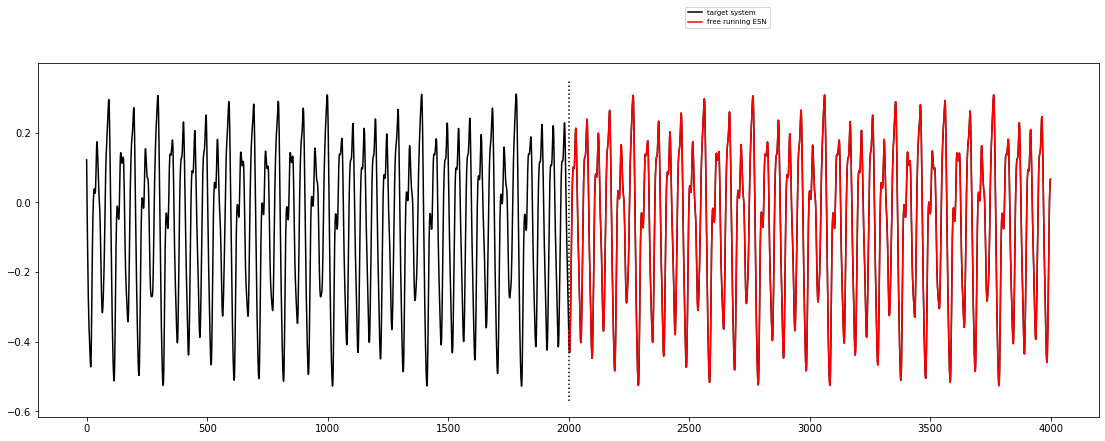

In [16]:
#import numpy as np
#from pyESN import ESN
from matplotlib import pyplot as plt
%matplotlib inline

data = np.load('mackey_glass_t17.npy') #  http://minds.jacobs-university.de/mantas/code
esn = ESN(n_inputs = 1,        # not searched
          n_outputs = 1,       # not searched
          
          n_reservoir = best_parameters[0],       
          projection = best_parameters[1],
          noise = best_parameters[2], 
          rectifier = best_parameters[3],
          steepness = best_parameters[4],
          sparsity = best_parameters[5],            
          sphere_radius = best_parameters[6],
          teacher_forcing = best_parameters[7],
          random_state= best_parameters[8],
          spectral_radius = best_parameters[9],     
)

trainlen = 2000
future = 2000
pred_training = esn.fit(np.ones(trainlen),data[:trainlen])

prediction = esn.predict(np.ones(future))
print("test error: \n"+str(np.sqrt(np.mean((prediction.flatten() - data[trainlen:trainlen+future])**2))))

plt.figure(figsize=(19,6.5))
plt.plot(range(0,trainlen+future),data[0:trainlen+future],'k',label="target system")
plt.plot(range(trainlen,trainlen+future),prediction,'r', label="free running ESN")
lo,hi = plt.ylim()
plt.plot([trainlen,trainlen],[lo+np.spacing(1),hi-np.spacing(1)],'k:')
plt.legend(loc=(0.61,1.1),fontsize='x-small')

In [17]:
print("CONCLUSION: The original pyESN.py demo has an error of 0.139603909616, versus this tuned ESN with an error of ")
print(str(np.sqrt(np.mean((prediction.flatten() - data[trainlen:trainlen+future])**2))))
print()
print("These are the parameters that get this score:")
print("---------------------------------------------")

print("n_reservoir     = ", best_parameters[0])
print("projection      = ", best_parameters[1])
print("noise           = ", best_parameters[2])
print("rectifier       = ", best_parameters[3])
print("steepness       = ", best_parameters[4])
print("sparsity        = ", best_parameters[5])
print("sphere_radius   = ", best_parameters[6])
print("teacher_forcing = ", best_parameters[7])
print("random_state    = ", best_parameters[8])
print("spectral_radius = ", best_parameters[9])

CONCLUSION: The original pyESN.py demo has an error of 0.139603909616, versus this tuned ESN with an error of 
0.0002901725773040543

These are the parameters that get this score:
---------------------------------------------
n_reservoir     =  1000
projection      =  1
noise           =  0
rectifier       =  1
steepness       =  2
sparsity        =  0.7686812449454254
sphere_radius   =  35.86520316391459
teacher_forcing =  True
random_state    =  174
spectral_radius =  1.3472585851237922
